# Week 7 - Aditya Sumbaraju
http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
# loading packages
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import brfss

import thinkstats2
import thinkplot

## Exercise 7.1
Using data from the NSFG, make a scatter plot of birth weight
versus mother’s age. Plot percentiles of birth weight versus mother’s age.
Compute Pearson’s and Spearman’s correlations. How would you character-
ize the relationship between these variables?

In [13]:
import nsfg
preg = nsfg.ReadFemPreg()

### Scatterplot: birth weight versus mother’s age

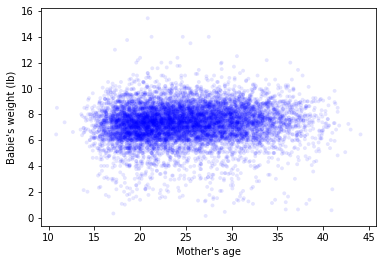

<Figure size 576x432 with 0 Axes>

In [14]:
thinkplot.Scatter(preg.agepreg, preg.totalwgt_lb, alpha = 0.1, s= 15)
thinkplot.Show(xlabel= "Mother's age", ylabel= "Babie's weight (lb)")

### Percentiles of birth weight versus mother’s age

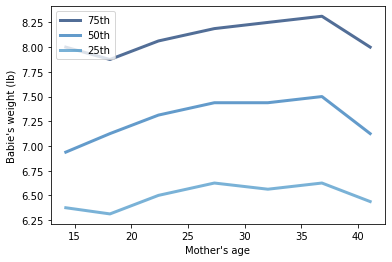

<Figure size 576x432 with 0 Axes>

In [15]:
df = preg.dropna(subset= ['agepreg', 'totalwgt_lb'])
bins = np.arange(10, 70, 5)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)
#for i, group in groups:
age = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
for percent in [75, 50 , 25]:
    weight = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(age, weight, label= label)
thinkplot.Show(xlabel= "Mother's age", ylabel= "Babie's weight (lb)")

### Pearson’s correlations

In [16]:
print("Pearson's correlation = ", thinkstats2.Corr(df.agepreg, df.totalwgt_lb))

Pearson's correlation =  0.06883397035410908


### Spearman’s Correlations

In [17]:
print("Spearman's correlation = ", thinkstats2.SpearmanCorr(df.agepreg, df.totalwgt_lb) )

Spearman's correlation =  0.09461004109658226


### Conclusions

* From the pearson Correlation coefficient, birth weight and mother’s age have no linear relationship (r=0.06) which implies that the birth weight does not depend on mother's age
* Similarly from spearman rank correlaton coefficient also there is no linear relationship between birth weight and mother’s age (rs=0.09). Which is further indicated by the scatterplot which doesnt display any linear trend between the two variables.

## Exercise 8.1

### Checking if ¯x and median are biased estimates of µ

In [7]:
### Defining the mean error fnction
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)
## Defining the variable for sapling n=7 for 100,000 times
import numpy as np
import random
def Estimate4(n=7, iters=100000):
    """Mean error for xbar and median as estimators of population mean.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('mean error xbar', MeanError(means, mu))
    print('mean error median', MeanError(medians, mu))
    
Estimate4()

Experiment 1
mean error xbar 0.0008618660709985297
mean error median 0.0011232861758213232


## Exercise 8.2
Suppose you draw a sample with size n = 10 from an exponen-
tial distribution with λ = 2. Simulate this experiment 1000 times and plot
the sampling distribution of the estimate L. Compute the standard error of
the estimate and the 90% confidence interval.
Repeat the experiment with a few different values of n and make a plot of
standard error versus n.

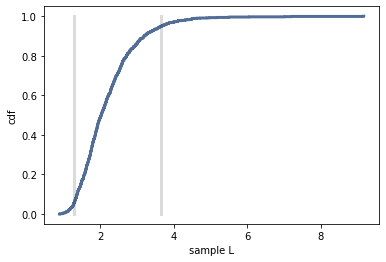

confidence interval 90% [1.2702020207173321, 3.642767555000469]
Standard error  0.8304962428954719


<Figure size 576x432 with 0 Axes>

In [9]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.
    estimate: sequence of numbers
    actual: actual value
    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def ExponentialSample(n=10, iters=1000):
    lam = 2

    means = []
    
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        means.append(L)

    return means
  
means = ExponentialSample()
cdf = thinkstats2.Cdf(means)
inter5, inter95 = cdf.Percentile(5), cdf.Percentile(95)
thinkplot.Plot([inter5, inter5],[0,1], color='0.8', linewidth=3)
thinkplot.Plot([inter95, inter95],[0,1], color='0.8', linewidth=3)
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel= 'sample L', ylabel= 'cdf')

print('confidence interval 90%',[cdf.Percentile(5), cdf.Percentile(95)])
standard_error = RMSE(means, 2)
print('Standard error ', standard_error)

10 0.8940695527343632 [1.2614215113599292, 3.7301419649522813]
20 0.5101293366064178 [1.4645489074257634, 3.056314699036391]
35 0.34532165767128487 [1.563301657280038, 2.7151709735243776]
50 0.2918805442464379 [1.597364050932765, 2.5630291717767353]
100 0.20554040956710698 [1.6937903268446948, 2.373117953680542]


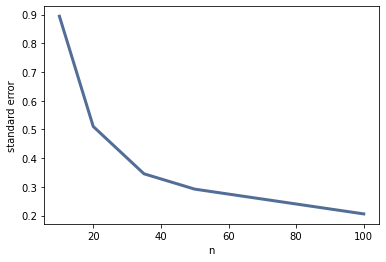

<Figure size 576x432 with 0 Axes>

In [10]:
ns = [10,20,35,50,100]
ses = []
for n in ns:
    means = ExponentialSample(n=n)
    se = RMSE(means, 2)
    ses.append(se)
    cdf = thinkstats2.Cdf(means)
    inter5, inter95 = cdf.Percentile(5), cdf.Percentile(95)
    print(n, se, [inter5, inter95])
thinkplot.plot(ns,ses)
thinkplot.show(xlabel= 'n', ylabel= 'standard error')

## Exercise 8.3
In games like hockey and soccer, the time between goals is
roughly exponential. So you could estimate a team’s goal-scoring rate by
observing the number of goals they score in a game. This estimation process
is a little different from sampling the time between goals, so let’s see how it
works.

Experiment 4
rmse L 1.413972418401434
mean error L -0.002286


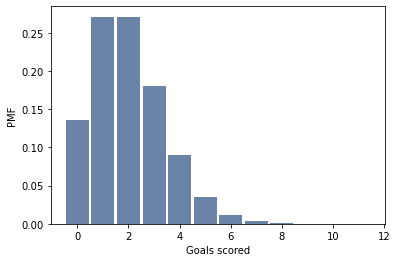

In [11]:
## Define a simulation function
def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L

### Define the function for computing the mean squared errors
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

### Define the function for creating the bar chart
def Estimate6(lam=2, m=1000000):

    estimates = []
    for i in range(m):
        L = SimulateGame(lam)
        estimates.append(L)

    print('Experiment 4')
    print('rmse L', RMSE(estimates, lam))
    print('mean error L', MeanError(estimates, lam))
    
    pmf = thinkstats2.Pmf(estimates)
    thinkplot.Hist(pmf)
    thinkplot.Config(xlabel='Goals scored', ylabel='PMF')
    
Estimate6()

The bar chart indiactes that the standard errors are not normally distributed, they are right skewed.